# KMeans Clustering

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Dog Horse KMeans Challenge

In [77]:
# Import Data
df_dh = pd.read_csv("https://raw.githubusercontent.com/gumdropsteve/datasets/master/dog_or_horse.csv")
# We picked variables that we need
X = df_dh[['height', 'weight']]
df_dh.head()

,height,weight,target,type
0,27.0,71.0,0.0,dog
1,27.0,92.0,0.0,dog
2,32.0,47.0,0.0,dog
3,30.0,90.0,0.0,dog
4,28.0,91.0,0.0,dog


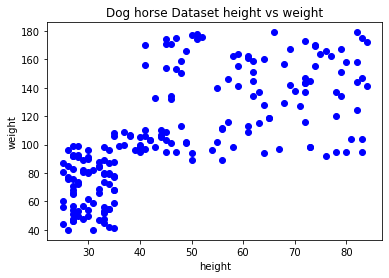

In [78]:
#Visualise data points

plt.scatter(df_dh['height'],df_dh['weight'],c='blue')

plt.title('Dog horse Dataset height vs weight')
plt.xlabel('height')
plt.ylabel('weight')

plt.show()

In [79]:
# Scale Data

# Fit & transform data.

x = df_dh[['height','weight']]
y = df_dh.target

In [80]:
# Scale Dataw
scalr = StandardScaler()
scald = scalr.fit_transform(x)

C:\Users\iand9\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


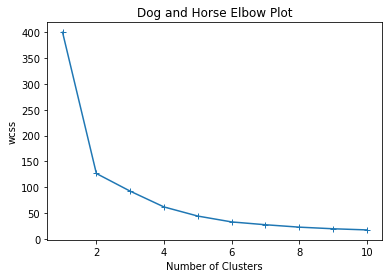

In [81]:
# Create Elbow Plot

# The elbow method depends on WCSS which stands for Within Cluster Sum of Squares

# Note: We are using K-mean++ to avoid the random initialization trap 
# Note: We are creating a plot of the WCSS for upto 10 clusters using the for loop
# The measurement we are using is the inertia 


# Create Elbow Plot
# Create Elbow Plot
wcss = [] # save inertia values
for j in range(1, 11): # test different n_clusters between 1-10
    km = KMeans(n_clusters=j)
    km.fit(scald) # apply KMeans
    wcss.append(km.inertia_) # Append inertia to list

# Plot Elbow
plt.plot([i for i in range(1, 11)], wcss, marker="+")
plt.title("Dog and Horse Elbow Plot")
plt.xlabel("Number of Clusters")
plt.ylabel("wcss");

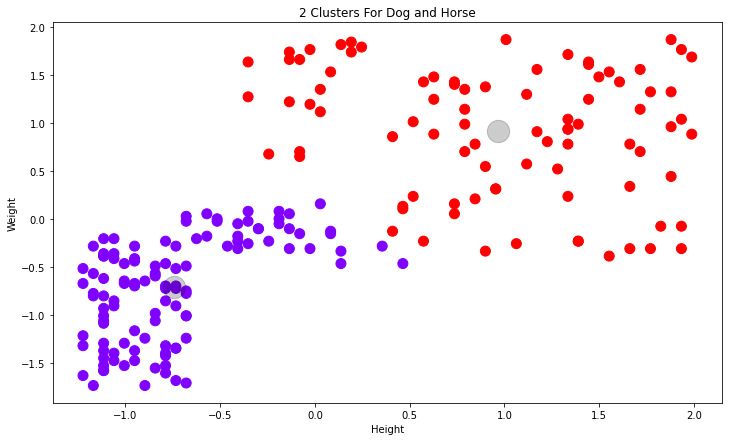

In [82]:
# Apply KMeans and Plot KMeans Results and Actual Results
km = KMeans(n_clusters=2)
km.fit(scald)
preds = km.labels_

y_kmeans = km.predict(scald)
plt.figure(figsize=(12,7))
plt.scatter(scald[:, 0], scald[:, 1],c=y_kmeans, s=100, cmap='rainbow')
plt.title('2 Clusters For Dog and Horse')
centers = km.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=500, alpha=0.2)
plt.xlabel("Height")
plt.ylabel("Weight");

In [83]:
print(y_kmeans)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1]


In [84]:
# Cluster centeriods
print (km.cluster_centers_)

[[-0.74395174 -0.70626086]
 [ 0.96628215  0.91732732]]


In [85]:
# assign the y_kmeans to a new column in the dataset
df_dh['kmean_prid']= y_kmeans
df_dh

,height,weight,target,type,kmean_prid
0,27.0,71.0,0.0,dog,0
1,27.0,92.0,0.0,dog,0
2,32.0,47.0,0.0,dog,0
3,30.0,90.0,0.0,dog,0
4,28.0,91.0,0.0,dog,0
...,...,...,...,...,...
195,55.0,140.0,1.0,horse,1
196,82.0,179.0,1.0,horse,1
197,46.0,132.0,1.0,horse,1
198,56.0,89.0,1.0,horse,0


In [86]:
# replace dog with 1 and horse with 0 to help us caluclate the Accuracy Score
df_dh['type'].map({'dog': 1, 'horse': 0}).astype(int)

0      1
1      1
2      1
3      1
4      1
      ..
195    0
196    0
197    0
198    0
199    0
Name: type, Length: 200, dtype: int32

In [87]:
test_dataset = pd.DataFrame(x, columns= ['type', 'kmean_prid'])

test_dataset['Actual'] = df_dh['type'].map({'dog': 1, 'horse': 0}).astype(int)
test_dataset['Predict'] =df_dh['kmean_prid']

test_dataset

,type,kmean_prid,Actual,Predict
0,NaN,NaN,1,0
1,NaN,NaN,1,0
2,NaN,NaN,1,0
3,NaN,NaN,1,0
4,NaN,NaN,1,0
...,...,...,...,...
195,NaN,NaN,0,1
196,NaN,NaN,0,1
197,NaN,NaN,0,1
198,NaN,NaN,0,0


In [88]:
# Calculate the number of correct predictions
(test_dataset['Actual'] == test_dataset['Predict']).value_counts()

False    187
True      13
dtype: int64

In [89]:
# Compute Accuracy Score of KMean Labels with True Labels
accuracy_score(y, preds)*100



93.5

# Seattle Weather KMeans Challenge

In [106]:
df_sea = pd.read_csv("https://raw.githubusercontent.com/gumdropsteve/datasets/master/seattle_weather_1948-2017.csv")
X_sea = df_sea[['tmax', 'tmin']]
df_sea.head()

,ds,prcp,tmax,tmin,rain
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True


In [107]:
df_sea.isnull().sum()


ds      0
prcp    3
tmax    0
tmin    0
rain    3
dtype: int64

In [108]:
# since prcp and rain has 3 null values we will fill those values with the mean
df_sea.prcp = df_sea.prcp.fillna(df_sea.prcp.mean())
df_sea.rain = df_sea.rain.fillna(df_sea.rain.mean())

In [109]:
df_sea.isnull().sum()


ds      0
prcp    0
tmax    0
tmin    0
rain    0
dtype: int64

In [110]:
df_sea.rain = df_sea.rain.astype(int)
df_sea.rain.value_counts()

0    14651
1    10900
Name: rain, dtype: int64

In [111]:
# Scale Data

# Fit & transform data.

x = df_sea[['prcp' ,'tmax' ,'tmin']]
y = df_sea.rain

In [112]:
# Scale Data
scaler = StandardScaler()
scalred = scaler.fit_transform(x)

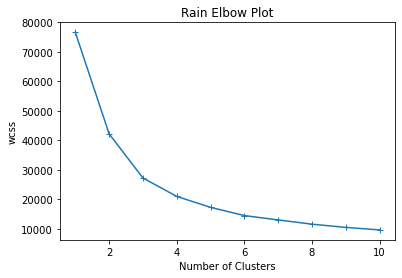

In [113]:
# Create Elbow Plot

# The elbow method depends on WCSS which stands for Within Cluster Sum of Squares

# Note: We are using K-mean++ to avoid the random initialization trap 
# Note: We are creating a plot of the WCSS for upto 10 clusters using the for loop
# The measurement we are using is the inertia 

wcss = [] # save inertia values
for k in range(1, 11): # test different n_clusters between 1-10
    km = KMeans(n_clusters=k)
    km.fit(scalred) # apply KMeans
    wcss.append(km.inertia_) # Append inertia to list

# Plot Elbow
plt.plot([i for i in range(1, 11)], wcss, marker="+")
plt.title("Rain Elbow Plot")
plt.xlabel("Number of Clusters")
plt.ylabel("wcss");

# From the plot we can see that the optimal number of clusters in 4, but our target is 2 so we should pick 2.

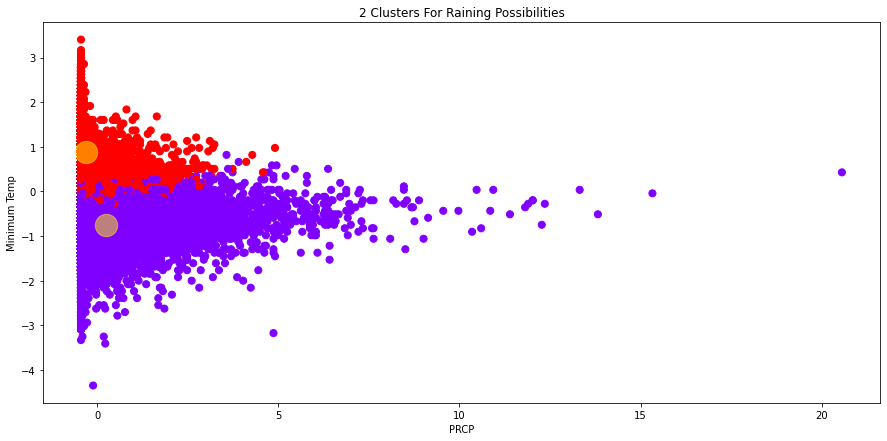

In [114]:
# Apply KMeans and Plot KMeans Results and Actual Results
kmean = KMeans(n_clusters=2)
kmean.fit(scalred)
preds = kmean.labels_

y_kmeans = kmean.predict(scalred)
plt.figure(figsize=(15,7))
#x = df_sea['prcp'] , y =df_sea['tmin']
plt.scatter(x = scalred[:, 0], y = scalred[:, 1],c=y_kmeans, s=50, cmap='rainbow')
plt.title('2 Clusters For Raining Possibilities')
centers = kmean.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='yellow', s=500, alpha=0.5)
plt.xlabel("PRCP")
plt.ylabel("Minimum Temp");

In [115]:
preds = kmean.labels_
preds

array([0, 0, 0, ..., 0, 0, 0])

In [116]:
# assign the y_kmeans to a new column
df_sea['kmean_prid']= y_kmeans
df_sea

,ds,prcp,tmax,tmin,rain,kmean_prid
0,1948-01-01,0.47,51,42,1,0
1,1948-01-02,0.59,45,36,1,0
2,1948-01-03,0.42,45,35,1,0
3,1948-01-04,0.31,45,34,1,0
4,1948-01-05,0.17,45,32,1,0
...,...,...,...,...,...,...
25546,2017-12-10,0.00,49,34,0,0
25547,2017-12-11,0.00,49,29,0,0
25548,2017-12-12,0.00,46,32,0,0
25549,2017-12-13,0.00,48,34,0,0


In [117]:
test_dataset = pd.DataFrame(x, columns= ['rain','kmean_prid'])

test_dataset['Actual1'] = df_sea['rain'].map({True: 1, False: 0}).astype(bool)
test_dataset['Predict1'] =df_sea['kmean_prid']

test_dataset

,rain,kmean_prid,Actual1,Predict1
0,NaN,NaN,True,0
1,NaN,NaN,True,0
2,NaN,NaN,True,0
3,NaN,NaN,True,0
4,NaN,NaN,True,0
...,...,...,...,...
25546,NaN,NaN,False,0
25547,NaN,NaN,False,0
25548,NaN,NaN,False,0
25549,NaN,NaN,False,0


In [118]:
# Calculate the number of correct predictions

(test_dataset['Actual1'] == test_dataset['Predict1']).value_counts()

False    16944
True      8607
dtype: int64

In [119]:
test_dataset

,rain,kmean_prid,Actual1,Predict1
0,NaN,NaN,True,0
1,NaN,NaN,True,0
2,NaN,NaN,True,0
3,NaN,NaN,True,0
4,NaN,NaN,True,0
...,...,...,...,...
25546,NaN,NaN,False,0
25547,NaN,NaN,False,0
25548,NaN,NaN,False,0
25549,NaN,NaN,False,0


In [120]:
df_sea.rain = df_sea.rain.astype(int)
df_sea.rain.value_counts()

0    14651
1    10900
Name: rain, dtype: int64

In [121]:
# Compute Accuracy Score of KMean Labels with True Labels
accuracy_score(y, preds)


0.33685570036397794

# Random Blob KMeans Challenge

- You dont have true labels for this data so this is truly an unsupervised dataset
- The blobs are randomly generated every time you run the cell and their characteristics are:
    - 2000-4000 data points
    - 10-30 blobs created

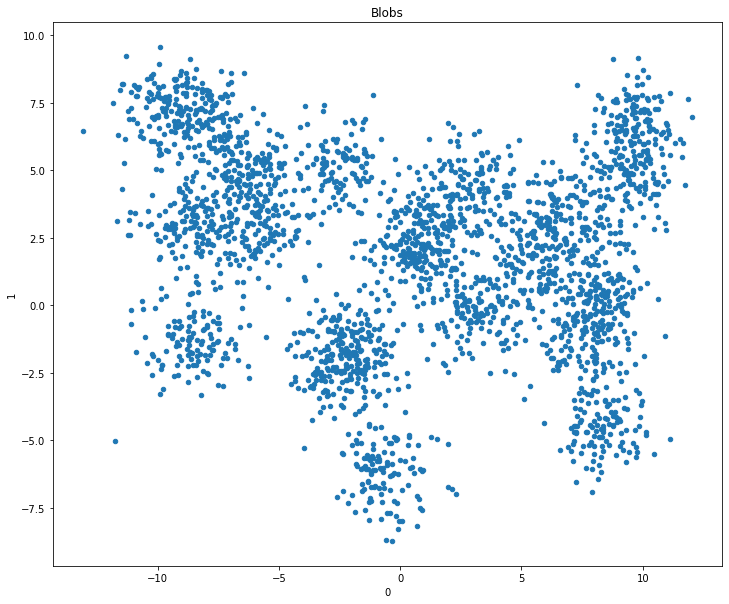

In [141]:
df_blob = pd.DataFrame(make_blobs(random.randint(2000,4000), centers=random.randint(10,30))[0])
df_blob.plot(kind="scatter", x=0, y=1, title="Blobs", figsize=(12,10));

In [142]:
# Scale Data
ss = StandardScaler()
df_ss = ss.fit_transform(df_blob)


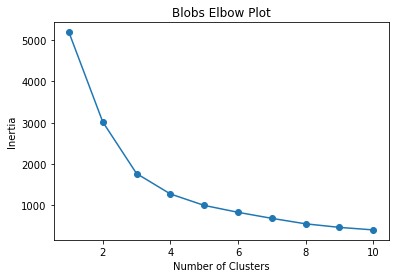

In [143]:
# Create Elbow Plot

# The elbow method depends on WCSS which stands for Within Cluster Sum of Squares
# Create Elbow Plot

wcss = [] # save inertia values
for k in range(1, 11): # test different n_clusters between 1-10
    km = KMeans(n_clusters=k)
    km.fit(df_ss) # apply KMeans
    wcss.append(km.inertia_) # Append inertia to list

# Plot Elbow
plt.plot([i for i in range(1, 11)], wcss, marker="o")
plt.title("Blobs Elbow Plot")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia");
# Note: We are using K-mean++ to avoid the random initialization trap 
# Note: We are creating a plot of the WCSS for upto 10 clusters using the for loop
# The measurement we are using is the inertia 



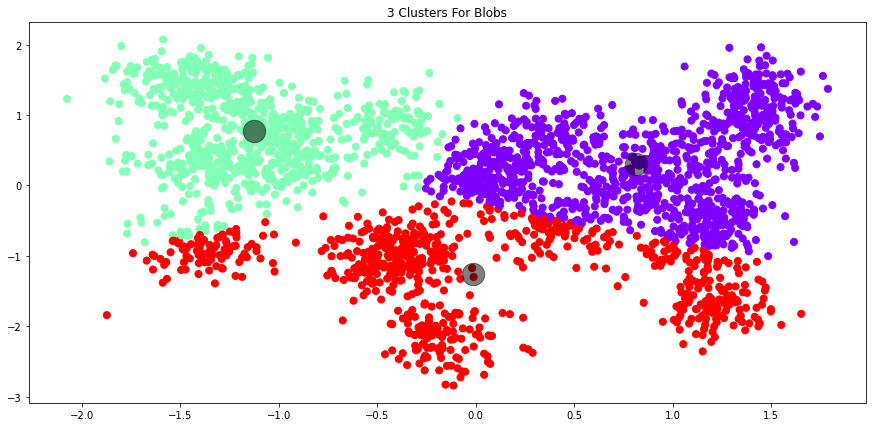

In [144]:
# Apply KMeans and Plot KMeans Results and Actual Results
km= KMeans(n_clusters=3)
km.fit(df_ss)
preds= km.labels_

y_kmm = km.predict(df_ss)
plt.figure(figsize=(15,7))

plt.scatter(df_ss[:, 0], df_ss[:, 1], c=y_kmm, s=50, cmap='rainbow')
plt.title('3 Clusters For Blobs')
centers = km.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=500, alpha=0.5);


In [151]:
# Plot the clusters 

In [152]:
wcss = KMeans(n_clusters = 4, init = 'k-means++', random_state = 123)
y_kmeans = wcss.fit_predict(X)

In [153]:
X=X.values

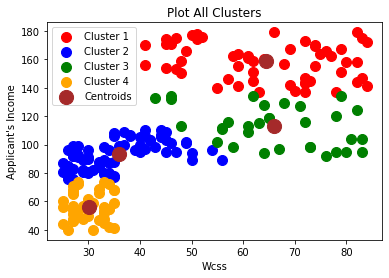

In [154]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')

plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')

plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')

plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'orange', label = 'Cluster 4')
plt.scatter(wcss.cluster_centers_[:, 0],wcss.cluster_centers_[:, 1], s = 200, c = 'brown', label = 'Centroids')
plt.title('Plot All Clusters')
plt.xlabel('Wcss')
plt.ylabel('Applicant\'s Income')
plt.legend()
plt.show()